# Маркетинговое исследование приложения Procrastinate Pro+

### Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания Procrastinate Pro+ терпит убытки.  
Наша задача — разобраться в причинах и помочь компании выйти в плюс.\
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:\
лог сервера с данными об их посещениях,\
выгрузка их покупок за этот период,\
рекламные расходы.

Нам предстоит изучить:\
откуда приходят пользователи и какими устройствами они пользуются,\
сколько стоит привлечение пользователей из различных рекламных каналов;\
сколько денег приносит каждый клиент,\
когда расходы на привлечение клиента окупаются,\
какие факторы мешают привлечению клиентов.

### Описание данных 

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:\
User Id — уникальный идентификатор пользователя,\
Region — страна пользователя,\
Device — тип устройства пользователя,\
Channel — идентификатор источника перехода,\
Session Start — дата и время начала сессии,\
Session End — дата и время окончания сессии.

Структура orders_info_short.csv:\
User Id — уникальный идентификатор пользователя,\
Event Dt — дата и время покупки,\
Revenue — сумма заказа.

Структура costs_info_short.csv:\
dt — дата проведения рекламной кампании,\
Channel — идентификатор рекламного источника,\
costs — расходы на эту кампанию.


## Загрузим данные и подготовим их к анализу



**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

In [1]:
import pandas as pd #импортируем нужные библиотеки
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'), # журнал визитов
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'), # заказы
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [3]:
visits.info()#общая информация о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.columns = visits.columns.str.lower() #приведем названия столбцов к нижнему регистру
visits.columns = visits.columns.str.replace(" ", "_") #заменим пропуски на нижние подчеркивания

In [5]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
visits.head() #выведем на экран первые 5 строк

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
orders.info()#общая информация о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
orders.columns = orders.columns.str.lower() #приведем названия столбцов к нижнему регистру
orders.columns = orders.columns.str.replace(" ", "_") #заменим пропуски на нижние подчеркивания

In [9]:
# преобразование данных о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [10]:
orders.head() #выведем на экран первые 5 строк

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
costs.info()#общая информация о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
costs.columns = costs.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [13]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [14]:
costs.head() #выведем на экран первые 5 строк

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Проверим пропуски в значениях. Обратимся ко всем датафреймам по очереди

In [15]:
visits.isnull().sum() #оценим количество пропущенных значений в каждом столбце

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [16]:
orders.isnull().sum() #оценим количество пропущенных значений в каждом столбце

user_id     0
event_dt    0
revenue     0
dtype: int64

In [17]:
costs.isnull().sum() #оценим количество пропущенных значений в каждом столбце

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет, проверим на дубликаты

In [18]:
visits.duplicated().sum() #обратимся ко всем датафреймам по очереди

0

In [19]:
orders.duplicated().sum()

0

In [20]:
costs.duplicated().sum()

0

Отлично, дубликатов нет

Набор данных достаточен. Данные прошли предобработку и соответствуют неоходимому уровню качества для дальнейшего интеллектуального анализа и проверке гипотез

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
   

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца и недели в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [22]:
# функция для расчёта удержания (Retention Rate)

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



In [23]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации удержания (Retention Rate)

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


In [27]:
# функция для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## Исследовательский анализ данных

### Профили пользователей. Минимальная и максимальная даты привлечения пользователей

In [29]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,28,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,40,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,34,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,40,False,0.230769


In [30]:
#минимальная дата привлечения
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [31]:
#максимальная дата привлечения
profiles['dt'].max()

datetime.date(2019, 10, 27)

### Задаём момент и горизонт анализа данных

В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [32]:
# задаём момент и горизонт анализа данных
observation_date = profiles['dt'].max()#datetime(2019, 10, 27).date()
horizon_days = 14

### Страны пользователей приложения.

In [34]:
#посчитаем количество пользователей по странам
profiles.groupby('region')['user_id'].count().sort_values(ascending=False)

region
United States    100002
UK                17575
France            17450
Germany           14981
Name: user_id, dtype: int64

*В United States количество пользователей приложения в разы превышает другие страны. Даже в два раза больше суммарного количества из UK, France и Germany*  

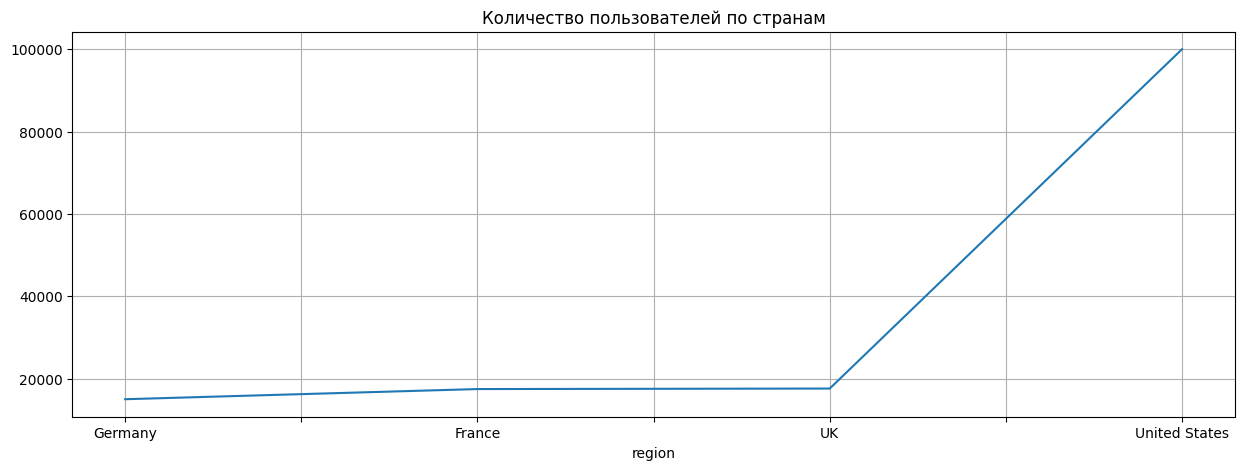

In [35]:
#построим график для наглядности
profiles.groupby('region')['user_id'].count().sort_values(ascending=True).plot(grid=True, figsize=(15, 5))
plt.title('Количество пользователей по странам');

#### Страна с  наибольшим количеством платящих пользователей.

In [36]:
profiles.query('payer == True').groupby('region')['user_id'].count().sort_values(ascending=False)

region
United States    6902
UK                700
France            663
Germany           616
Name: user_id, dtype: int64

*Количество платящих клиентов из United States на порядок выше каждой из остальных стран. В сумме платящие пользователи из других стран составляют 28,7% от United States*

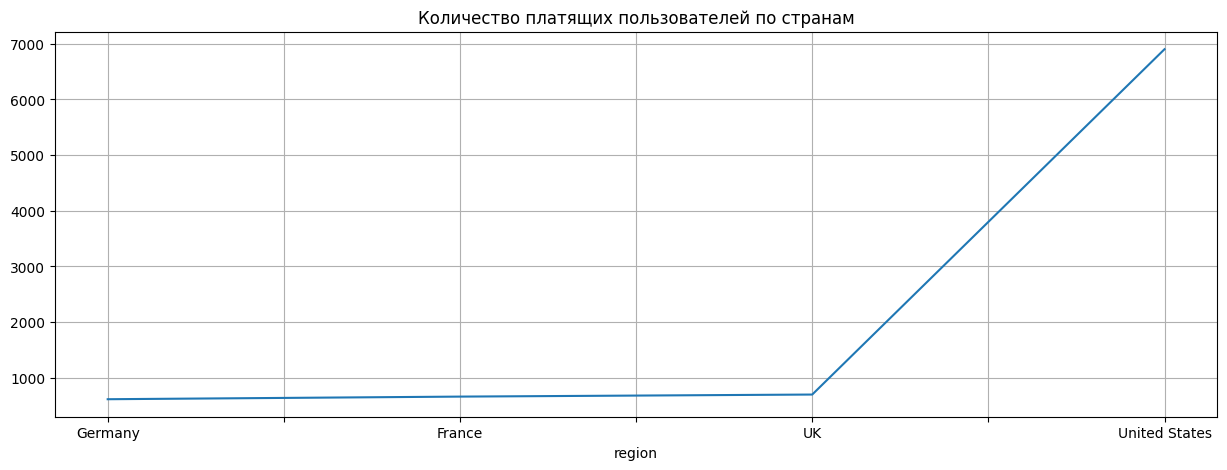

In [37]:
profiles.query('payer == True').groupby('region')['user_id'].count().sort_values(ascending=True).plot(grid=True, figsize=(15, 5))
plt.title('Количество платящих пользователей по странам');

#### Таблица отражающая количество пользователей и долю платящих из каждой страны.

In [38]:
profiles.groupby('region').agg({'user_id' : 'count','payer' :'mean'}).sort_values('payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


*Доля платящих клиентов к количеству по странам выше у United States приближаясь к 7%, в остальных она около 4%*

### Устройства пользователей приложения.

#### Какими устройствами пользуются клиенты

In [39]:
#посчитаем количество пользователей по устройствам
profiles.groupby('device')['user_id'].count().sort_values(ascending=False)

device
iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: user_id, dtype: int64

 *Более 36% клиентов пользуются устройством iPhone, далее Android с 23%,  следом PC и Mac по 20%*

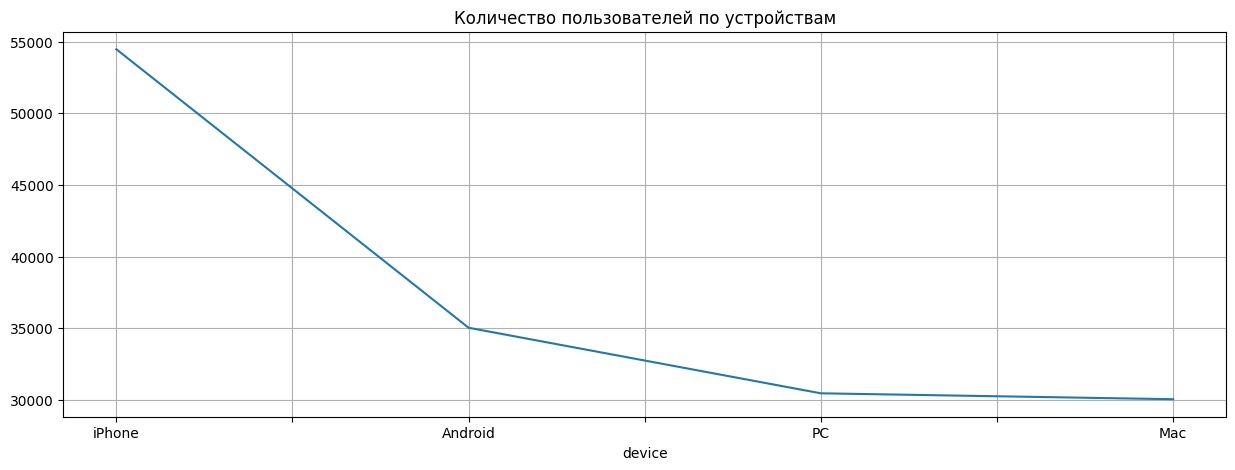

In [40]:
#количество пользователей по устройствам
profiles.groupby('device')['user_id'].count().sort_values(ascending=False).plot(grid=True, figsize=(15, 5))
plt.title('Количество пользователей по устройствам');

#### Устройства предпочитаемые платящими пользователями

In [41]:
#устройства предпочитающие платящие пользователи
profiles.query('payer == True').groupby('device')['user_id'].count().sort_values(ascending=False)

device
iPhone     3382
Android    2050
Mac        1912
PC         1537
Name: user_id, dtype: int64

*Платящие пользователи также предпочитают iPhone их доля составляет 38%, далее Android, Mac и PC с 23%, 21% и 17% соответственно*

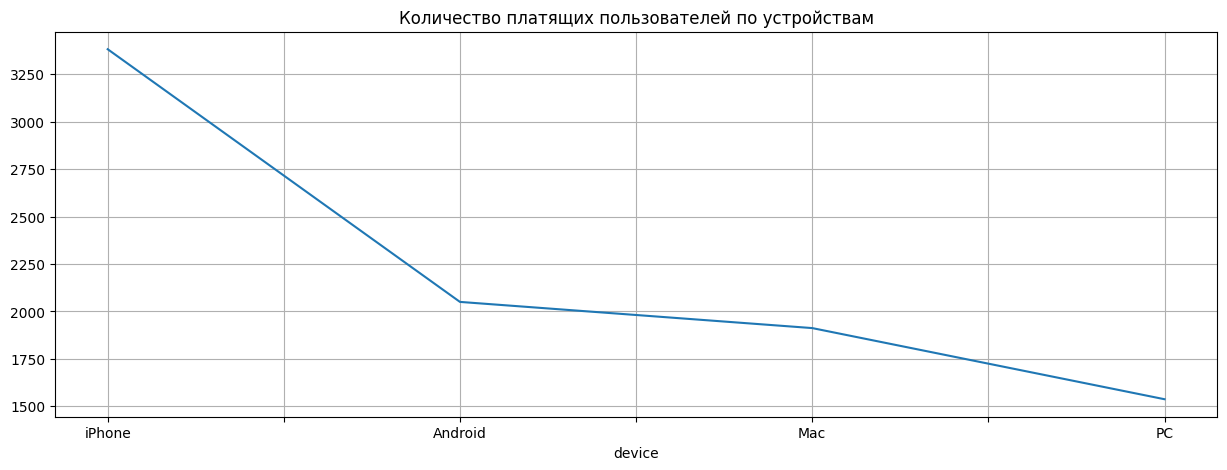

In [42]:
#график устройства предпочитающие платящие пользователи
profiles.query('payer == True').groupby('device')['user_id'].count().sort_values(ascending=False).plot(grid=True, figsize=(15, 5))
plt.title('Количество платящих пользователей по устройствам');

#### Таблица отражающая количество пользователей и долю платящих для каждого устройства

In [43]:
#Таблица отражающая количество пользователей и долю платящих для каждого устройства
profiles.groupby('device').agg({'user_id' : 'count','payer' :'mean'}).sort_values('payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


*Доля платящих на Mac выше чем у iPhone, следом идут Android и PC*

### Рекламные источники привлечения.

In [44]:
#посчитаем количество пользователей по каналам привлечения
profiles.groupby('channel')['user_id'].count().sort_values(ascending=False)

channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

*Основной источник привлечения пользователей - органическая выдача. В твердой тройке лидеров  FaceBoom и TipTop. Учтем и следующие три канала: OppleCreativeMedia, LeapBob и WahooNetBanner*

#### Рекламные источники привлекшие платящих пользователей

In [46]:
#рекламные источники привлекшие платящих пользователей
profiles.query('payer == True').groupby('channel')['user_id'].count().sort_values(ascending=False)

channel
FaceBoom              3557
TipTop                1878
organic               1160
WahooNetBanner         453
AdNonSense             440
RocketSuperAds         352
LeapBob                262
OppleCreativeMedia     233
lambdaMediaAds         225
YRabbit                165
MediaTornado           156
Name: user_id, dtype: int64

*Основные рекламные источники привлекшие платящих пользователей: FaceBoom в два раза превышающий TipTop и органическая выдача, далее с отрывом WahooNetBanner и AdNonSense* 

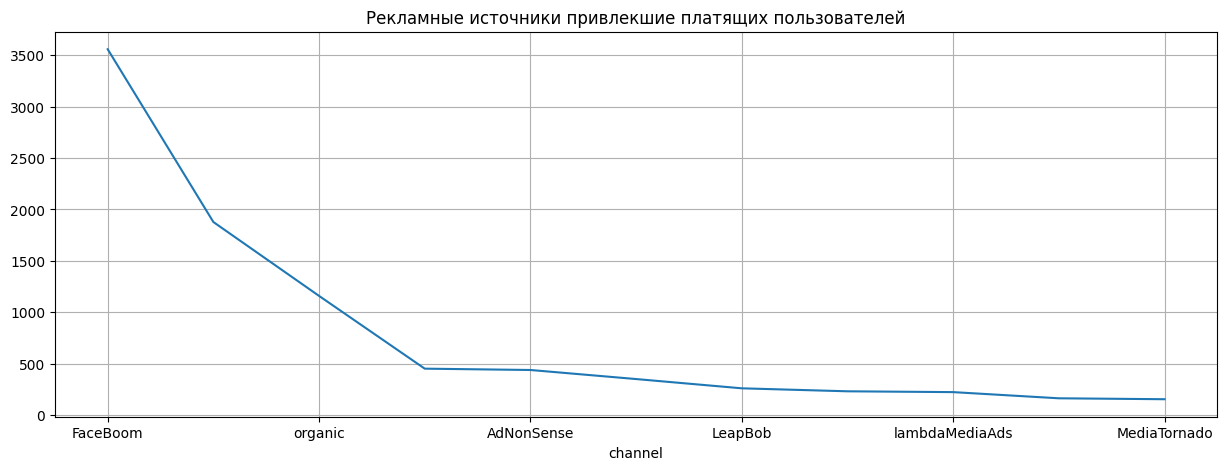

In [47]:
profiles.query('payer == True').groupby('channel')['user_id'].count().sort_values(ascending=False).plot(grid=True, figsize=(15, 5))
plt.title('Рекламные источники привлекшие платящих пользователей');

#### Таблица отражающая количество пользователей и долю платящих для каждого канала привлечения

In [48]:
#таблица отражающая количество пользователей и долю платящих для каждого канала привлечения
profiles.groupby('channel').agg({'user_id' : 'count','payer' :'mean'}).sort_values('payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


*Доля платящих также выше в FaceBoom, следом по убыванию - AdNonSense, lambdaMediaAds и  TipTop*

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг

In [49]:
int(profiles['acquisition_cost'].sum())

105497

In [50]:
int(costs['costs'].sum())

105497

*Общая сумма расходов на маркетинг составляет 105497$*

### Распределение трат по рекламным источникам

In [51]:
profiles.groupby('channel')['acquisition_cost'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
organic                   0.00
Name: acquisition_cost, dtype: float64

*Основная часть расходов на маркетинг приходится на два канала: TipTop 54751 и FaceBoom  32445 $ в сумме составляют 82% трат*

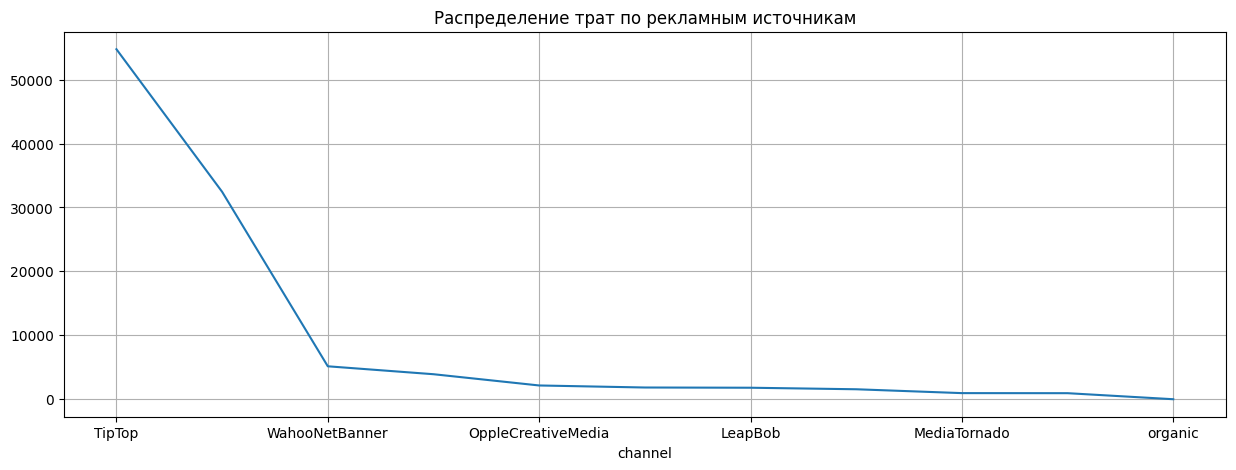

In [52]:
profiles.groupby('channel')['acquisition_cost'].sum().sort_values(ascending=False).plot(grid=True, figsize=(15, 5))
plt.title('Распределение трат по рекламным источникам');

### Визуализация динамики изменения расходов во времени  по каждому источнику

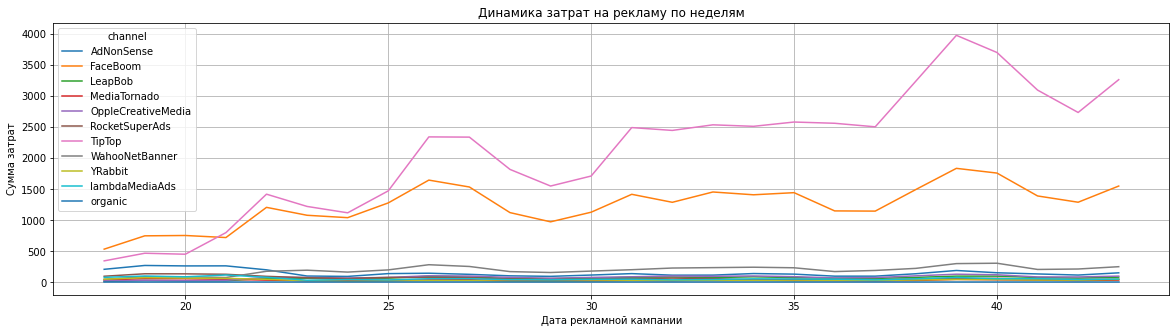

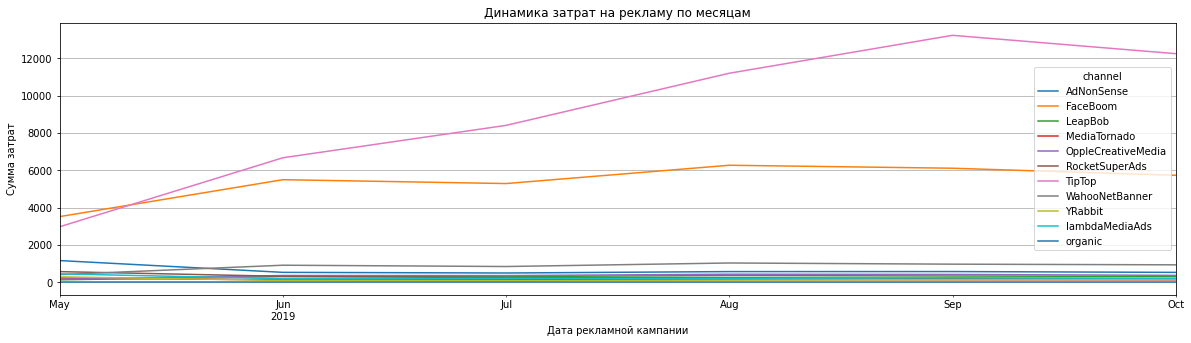

In [52]:
# визуализируем динамику изменения расходов по неделям и месяцам по источникам

plt.figure(figsize = (20, 5))

profiles.pivot_table(
index='week',
columns='channel',
values='acquisition_cost',
aggfunc='sum').plot(grid=True, ax=plt.subplot())
plt.xlabel('Дата рекламной кампании')
plt.ylabel('Сумма затрат')
plt.title('Динамика затрат на рекламу по неделям')

plt.figure(figsize = (20, 5))

profiles.pivot_table(
index='month',
columns='channel',
values='acquisition_cost',
aggfunc='sum').plot(grid=True, ax=plt.subplot())
plt.xlabel('Дата рекламной кампании')
plt.ylabel('Сумма затрат')
plt.title('Динамика затрат на рекламу по месяцам')

plt.show()

*Динамика изменения расходов по неделям и месяцам по источникам показывает существенный рост на FaceBoom и особенно на TipTop с превышением 12000 $ в сентябре и достигающий 4000 затрат на 39 неделе 2019 года!*

### Стоимость привлечения одного пользователя (CAC) из каждого источника

В функции get_profiles есть рачет стоимости привлечения каждого посетителя сайта, столбец acquisition_cost

In [53]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,28,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,40,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,34,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,40,False,0.230769


In [54]:
# считаем средний CAC по каналам привлечения

cac = (
   profiles.groupby('channel')
   .agg({'acquisition_cost': 'mean'})
   .rename(columns={'acquisition_cost': 'cac'})
   .sort_values('cac', ascending=False)
)

cac

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


*Средняя стоимость привлечения пользователя неоправданно высока у TipTop составляя 2.799. FaceBoom - 1.11, AdNonSense 1.0 У нескольких каналов: LeapBob, MediaTornado, YRabbit и OppleCreativeMedia стоимость привлечения в районе 0.2*   

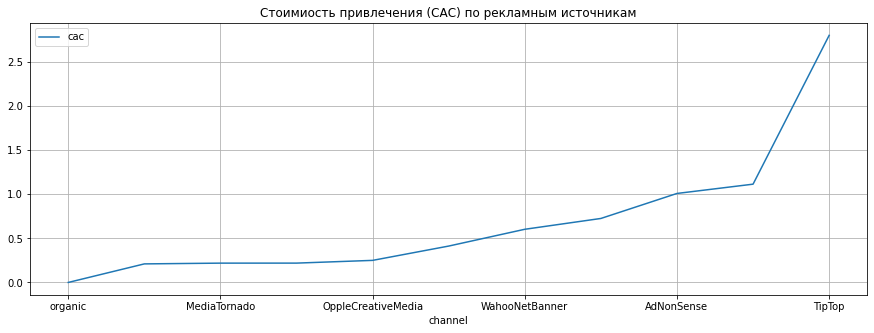

In [55]:
cac.sort_values('cac', ascending=True).plot(grid=True, figsize=(15, 5))
plt.title('Стоимиость привлечения (САС) по рекламным источникам');

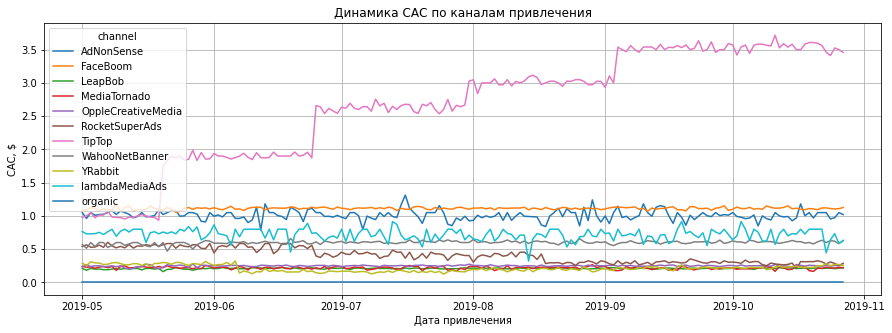

In [56]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
   index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

*Динамика изенения САС по каналам показывает многократный рост расходов на TipTop с конца мая 2019 года*  

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, судя по графикам, стоит обратить особое внимание на каналы TipTop и FaceBoom

</div>


## Оценим окупаемость рекламы

### Проанализируем окупаемость рекламы

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь рекомендую исключить из дальнейшего анализа органических пользователей - за них мы ничего не платим

</div>


In [57]:
#исключим из дальнейшего анализа окупаемости рекламы пользователей пришедших из органической выдачи
profiles = profiles.query('channel != "organic"')

<div class="alert alert-info">
<b>
Исключил бесплатных </b>
    
<br>
    <div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Хорошо👍

</div>

</div>


In [58]:
#еще раз выведем САС, теперь все источники с расходами
cac = (
   profiles.groupby('channel')
   .agg({'acquisition_cost': 'mean'})
   .rename(columns={'acquisition_cost': 'cac'})
   .sort_values('cac', ascending=False)
)

cac

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


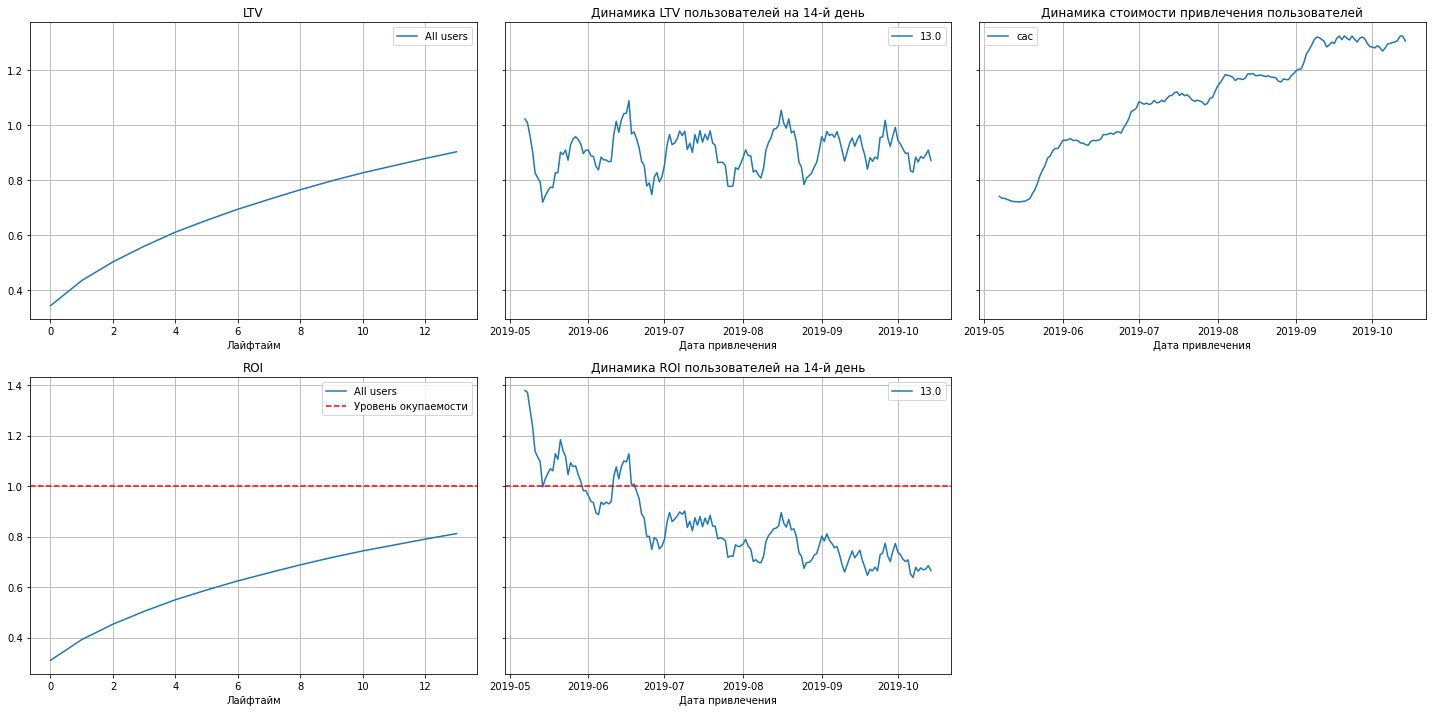

In [59]:
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*САС существенно растет, что показывает увеличение рекламного бюджета. Реклама начинает окупаться к 13 дню, но это в среднем за весь период. Динамика ROI показывает убыточность рекламной кампании с июля месяца. LTV подвержен сезонности но достаточно стабилен, что показывает качество пользователей*   

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   ROI падает, так как растет привлечение

</div>


### Проверим конверсию и удержание пользователей, а также динамику их изменения. 

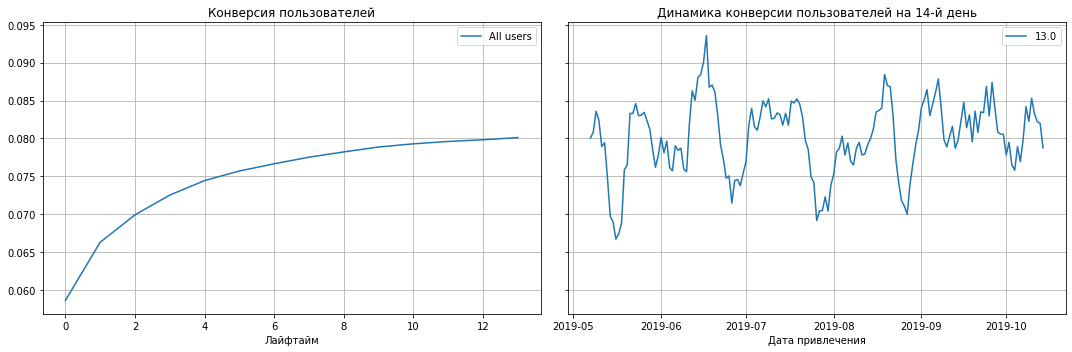

In [60]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


*Общая конвертация достаточно хороша, причем постоянно. Проверим удержание*

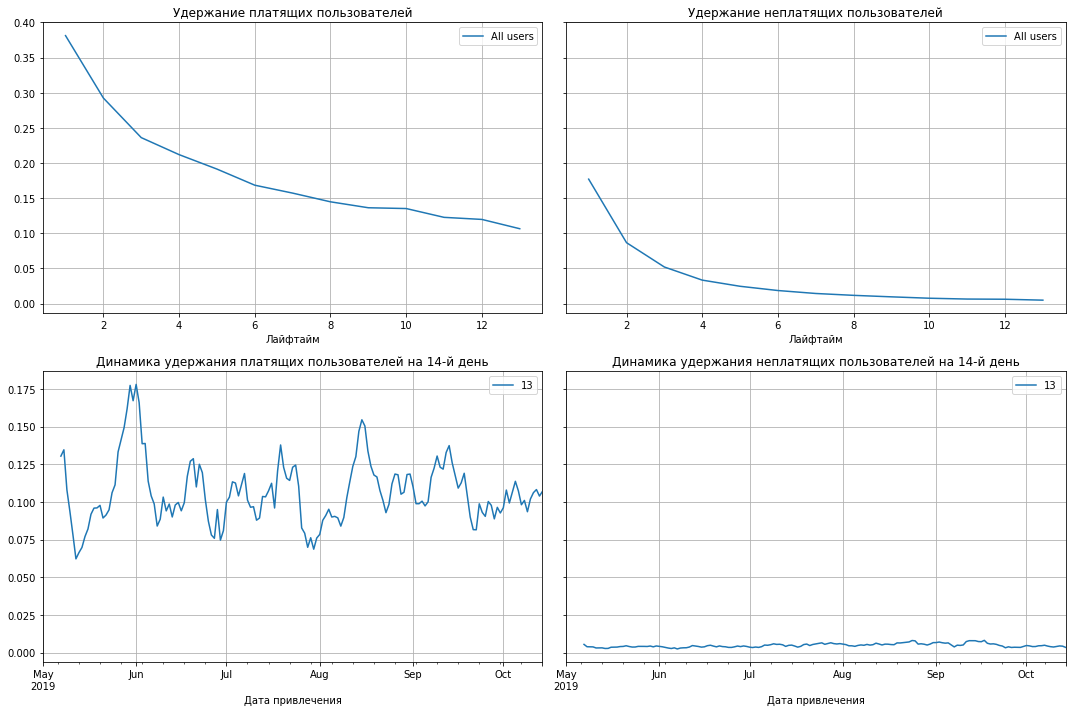

In [61]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Кривая удержания платящих пользователей с 1 по 4 лайфтайм слишком круто стремится вниз*

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен

</div>


*Продолжим разбираться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения*
 

### Проанализируем окупаемость рекламы с разбивкой по устройствам

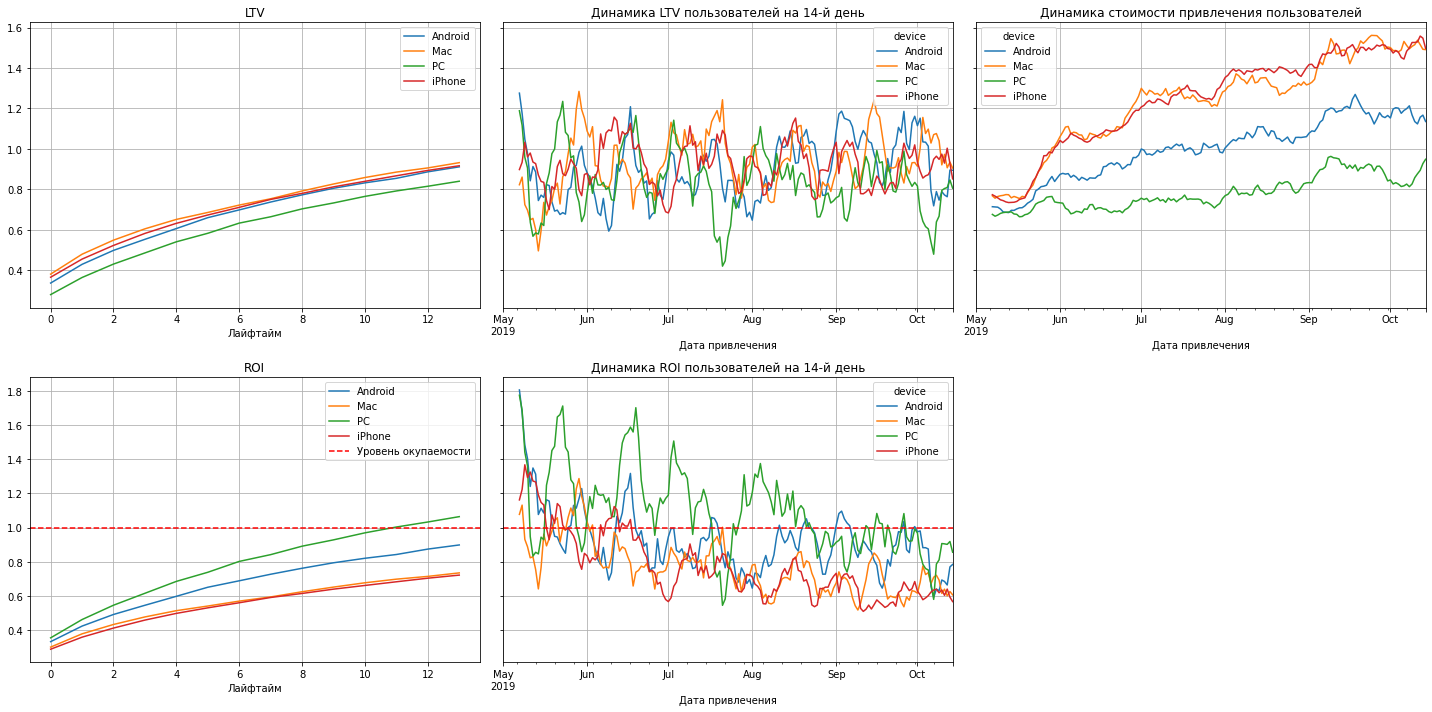

In [62]:
# считаем LTV и ROI с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*LTV несколько ниже у PC. Динамика САС у iPhone и Mac существенно выросла. Реклама на iPhone и Mac не окупается с июля месяца. Положительный ROI у PC и Android, которые  и подтянули общую картину*

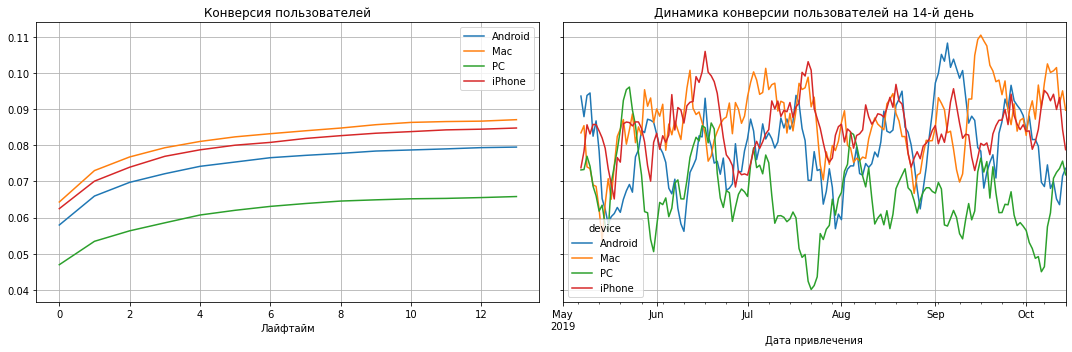

In [63]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


*Конверсия выше у пользователей на Mac и iPhone. Заметно низкая на PC* 

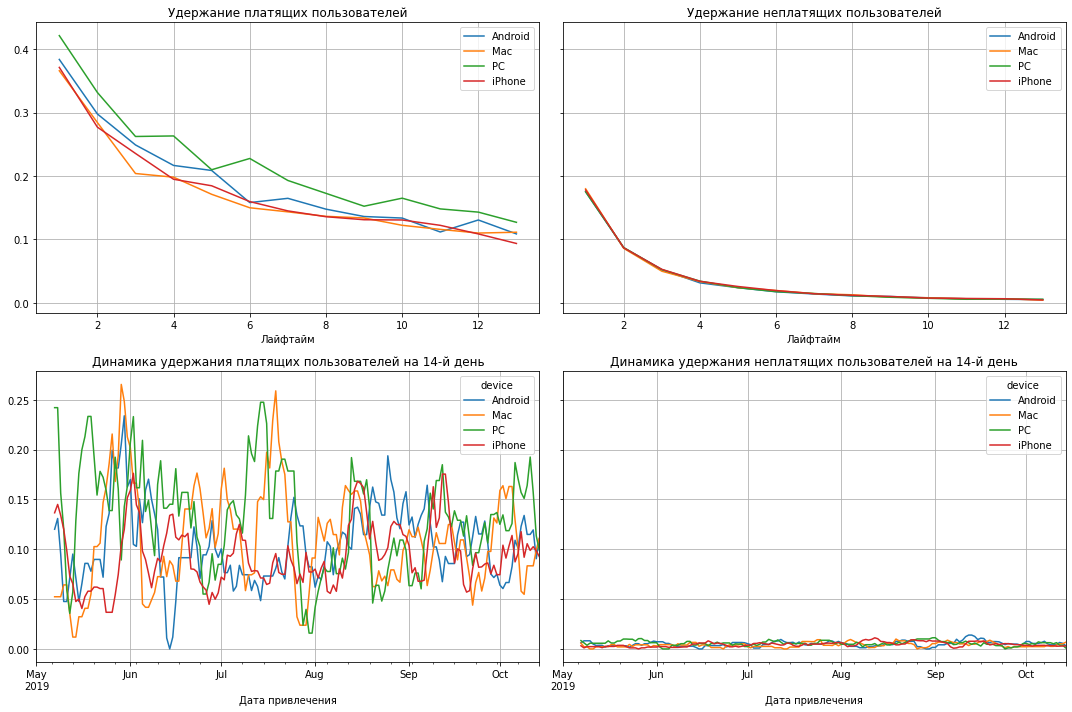

In [64]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Падение удержания особенно заметно у Mac и iPhone c 1 по 4 лайфтайм*

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   При этом стоит помнить, что данные устройства популярны в США

</div>


<div class="alert alert-info">
<b>
Да, их не предлагаем "резать". Потенциал большой.</b>
<br>
</div>


### Проанализируем окупаемость рекламы с разбивкой по странам

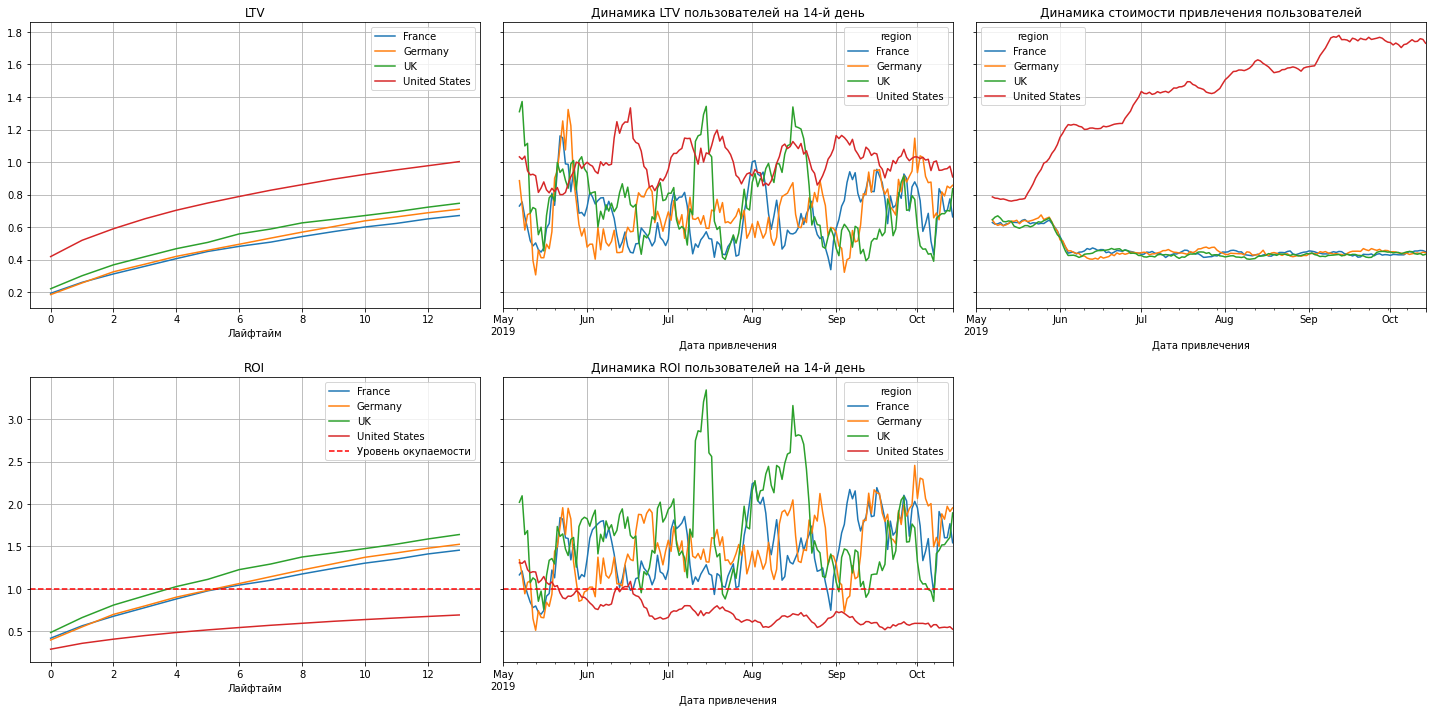

In [65]:
# считаем LTV и ROI с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*Среди стран выделяется United States с неоправданно высоким LTV и полным отсутствием окупаемости с конца июня*

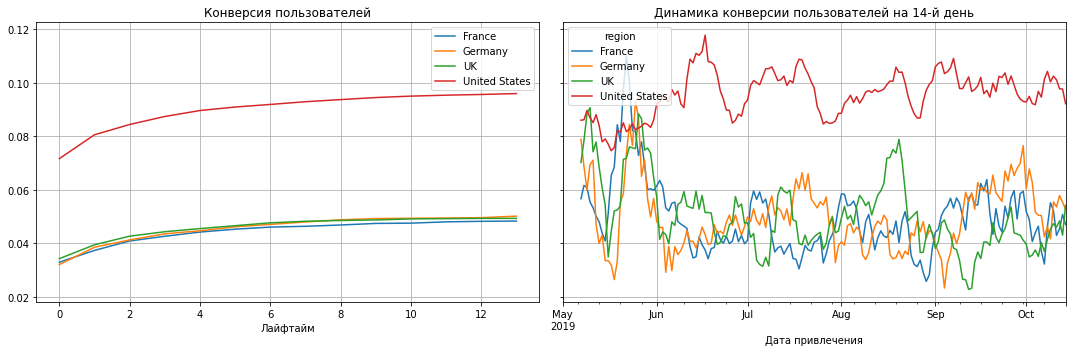

In [66]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


*А вот конвертируются клиенты из United States заметно лучше всех остальных* 

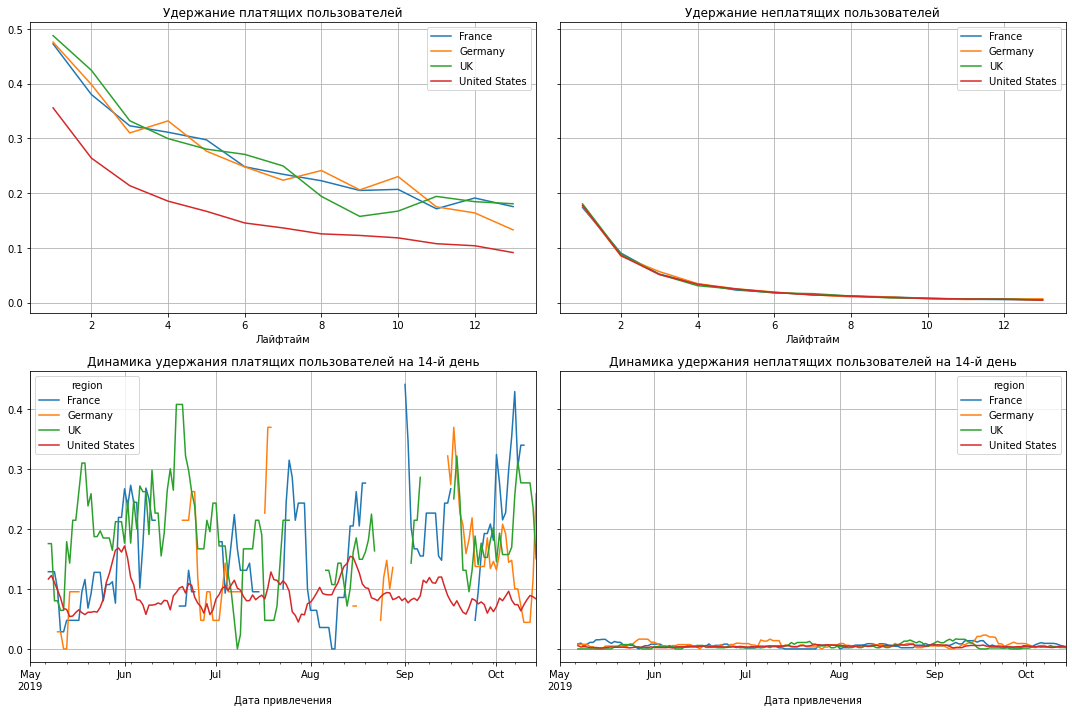

In [67]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Пользователи United States стабильно плохо удерживаются*

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, по США определенно заметны проблемы

</div>


### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

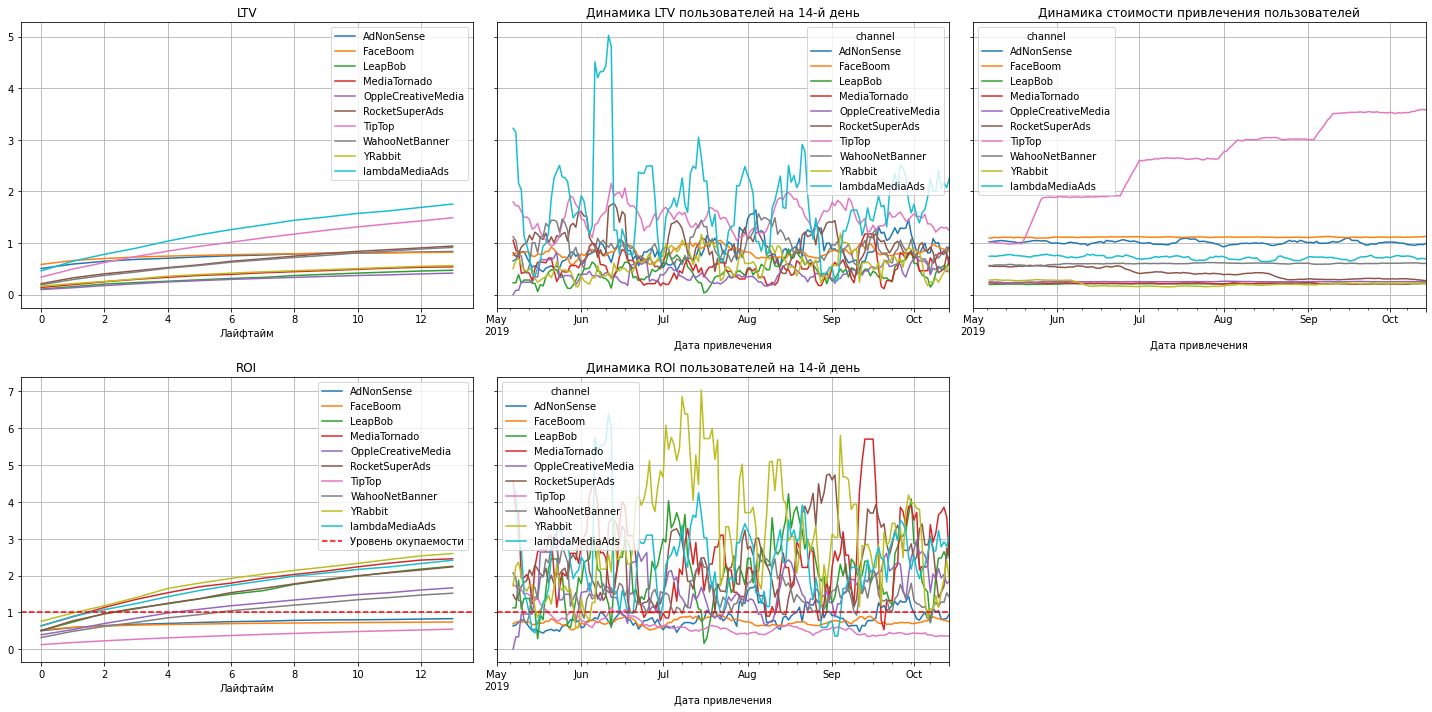

In [68]:
# считаем LTV и ROI с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*Динамика роста стоимости привлечения пользователей канала Tip Top просто зашкаливает, вместе с FaceBoom и LeapBob они не рентабельны - ROI ниже окупаемости*  

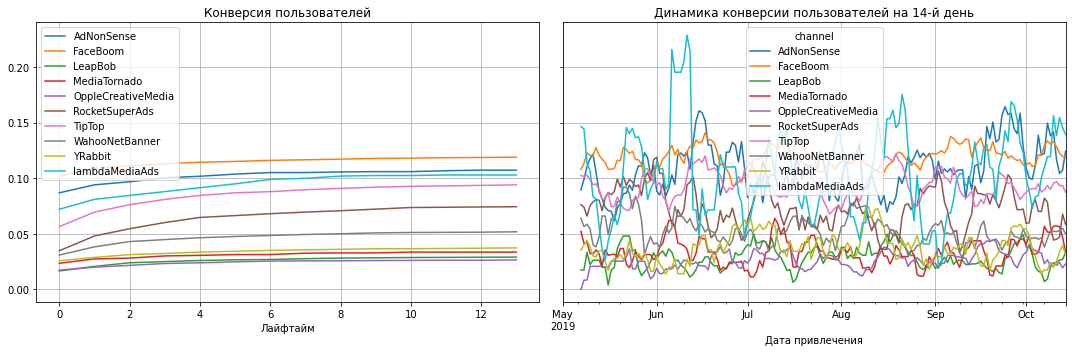

In [69]:
# смотрим конверсию с разбивкой по каналам привлечения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


*Высокая конверсия у FaceBoom, AdNonSence и LambdaMediaAds*

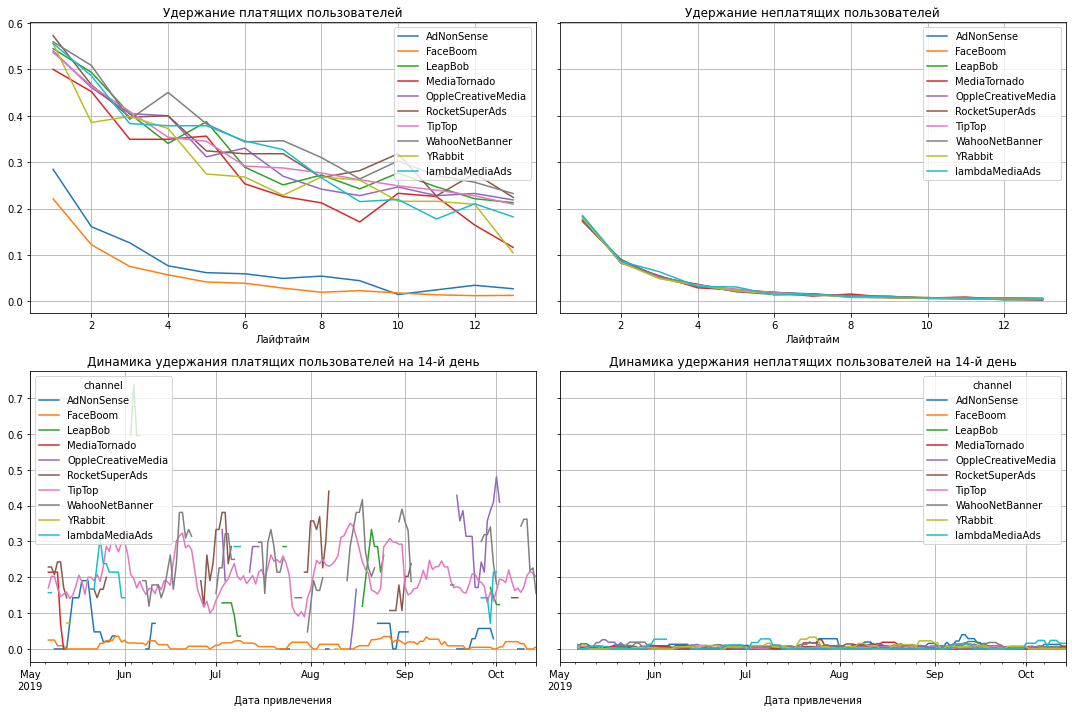

In [70]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Эти же каналы демонстрируют низкое удержание, у AdNonSence и FaceBoom оно гораздо ниже остальных* 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно. Дополню твои выводы. TipTop - очень дорогой канал, тянущий деньги. FaceBoom приводит платящих пользователей с низким качеством, они быстро уходят.

</div>


## Выводы

**Причиной убыточности Procrastinate Pro+ является многократно возросший рекламный бюджет на неэффективные рекламные кампании. Выделим три нерентабельных направления:\
каналы продвижения: Tip Top и FaceBoom\
регион: United States\
устройства: iPhone и Mac**


**Рекомендую перераспределить рекламный бюджет следующим образом:\
каналы продвижения: Tip Top и FaceBoom снизить рекламный бюджет до уровня май 2019 года\
рассмотреть каналы с низкой стоимостью привлечения, высоким ROI и долей привлечения\
CEO| оптимизировать органическую выдачу\
регионы: бюджет  United States оставить на том же уровне, перераспределив на другие каналы и устройства\
устройства: iOC проверить на технические ошибки**  

**Продлагаю:за счет снижения бюджета на Tip Top и FaceBoom,освободившиеся рекламные ресурсы направить:\
33% CEO| оптимизировать органическую выдачу\
33% каналы привлечения AdNonSense и lambdaMediaAds\
33% каналы привлечения MediaTornado,YRabbit и RocketSuperAds**  

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Андрей, проведен очень глубокий анализ👍

</div>
<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Но стоит немного детализировать выводы – все же указать, на какие конкретно источники следует переключить внимание?  Жду твой проект на повторное ревью.😉

</div>

<div class="alert alert-info">
<b>
Добавил</b>
<br>
</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Верно, а еще можно повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.

</div>